# Calc Vel Shift from original data --> specmatch result

In [143]:
import astropy.io.fits as fits
import matplotlib.pylab as plt
import numpy as np
from scipy.signal import medfilt
from scipy.interpolate import interp1d
from scipy.interpolate import splev, splrep
import math
from mpmath import mp
import os
import os.path 
import random
from random import seed
from random import choice
from random import uniform
import mplcursors
import pandas as pd
%matplotlib inline

## Read in all the files from Anna's directory
These are all the spec-match processed spectra that are used.

In [144]:
directory = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDR_corrected_wl_scale'

# every file in Anna's NDR_corrected_wl_scale folder
spec_files = []
for filename in os.listdir(directory):
    if filename.endswith(".fits"): 
        file_path = os.path.join(directory, filename)
        spec_files = np.append(spec_files, file_path)

In [145]:
# every file in Anna's NDR_corrected_wl_scale folder
list_of_files = []
for filename in os.listdir(directory):
    if filename.endswith(".fits"): 
        list_of_files = np.append(list_of_files, filename)

Create a list of all the original APF data files.

In [146]:
new_list_of_files = [s.replace(".NDR", "") for s in list_of_files]
original_files = ['/datag/blpd0/datax/apf/' + s for s in new_list_of_files]

# Test out on one spectrum

Star: HIP19855


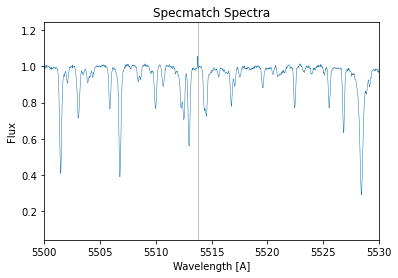

In [91]:
APF_flux_path = spec_files[1]
file = fits.open(APF_flux_path)
flux = file[0].data
wl = file[1].data

header = file[0].header
star = header['OBJECT']
print('Star: ' + star)

plt.figure()
plt.plot(wl, flux, linewidth=0.5)
# plt.xlim(5513.7, 5513.8)
plt.axvline(x = wl[28972], color='grey', lw = 0.5)
plt.xlim(5500, 5530)
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.title('Specmatch Spectra')

plt.show()


spec_wl = wl
spec_fl = flux


# boolean_array = np.logical_and(wl > 5513.7, wl < 5513.8)
# in_range_indices = np.where(boolean_array)[0]

# print(in_range_indices)

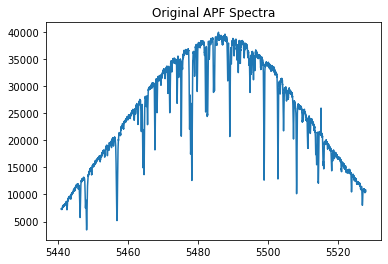

In [92]:
order = 39

APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl = wl_file[0].data

file = original_files[1]
f = fits.open(file)
flux = f[0].data

wl = wl[order]
flux = flux[order][:-1]

plt.figure()
plt.plot(wl, flux)
# plt.xlim(5080, 5100)
plt.title('Original APF Spectra')
plt.show()

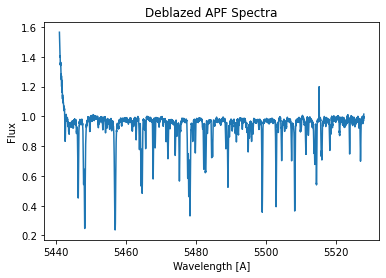

In [93]:
bin = 100

# this list will contain the indices corresponding to each of the 95th percentile flux values in each bin
indices = []

for i in np.arange((len(wl) - (bin)), step = bin):
    flux_values = []
    for j in np.arange(i, i + bin, step = 1):
        value = flux[j]
        flux_values = np.append(flux_values, value)
    # find the 95th percentile flux value: we use 95 to get the maximum flux value in general 
    # but avoid issues with cosmic rays and other emission lines
    flux_in_bin = np.percentile(flux_values, 95)
    # find the closest value in the flux array to the 95th percentile value
    absolute_difference_function = lambda list_value : abs(list_value - flux_in_bin)
    flux_in_bin = min(flux_values.tolist(), key=absolute_difference_function)
    index_in_bin = flux_values.tolist().index(flux_in_bin)
    index = i + index_in_bin
    indices = np.append(indices, index)

# these lists will contain the wavlength and flux values at each index in 'indices'
wl_values = []
fl_values = []

for index in indices:
    ind = int(index)
    wl_values = np.append(wl_values, wl[ind])
    fl_values = np.append(fl_values, flux[ind])
    
spl = splrep(wl_values, fl_values, s = 500000)
flux_fit = splev(wl, spl)

first_normalized_flux = flux / flux_fit
flux98 = np.percentile(first_normalized_flux, 98)
flux = first_normalized_flux / flux98


plt.plot(wl, flux)
plt.title('Deblazed APF Spectra')
plt.xlabel('Wavelength [A]')
plt.ylabel('Flux')
plt.show()

## Given an index in the spec match spectrum, find the corresponding wavelength in the original data.

In [117]:
index = 28972
spacing = 500 # look 500 pixels to the right and left of the event

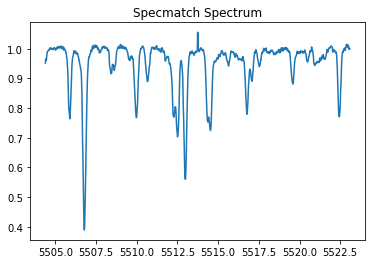

Event is located at 5513.740222772364 A in star rest wavelength.


In [134]:
plt.plot(spec_wl[index - spacing: index + spacing], spec_fl[index - spacing: index + spacing])
plt.title('Specmatch Spectrum')
plt.show()

wl_min = spec_wl[index - spacing]
wl_max = spec_wl[index + spacing]

print('Event is located at ' + str(spec_wl[index]) + ' A in star rest wavelength.')

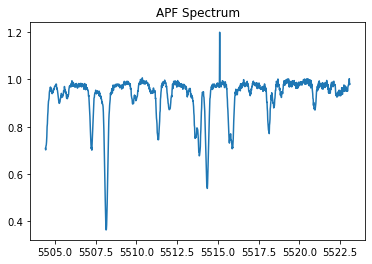

Event is located at 5515.108756261703 A in telescope rest wavelength.


In [131]:
boolean_array = np.logical_and(wl > wl_min, wl < wl_max)
in_range_indices = np.where(boolean_array)[0]

trunc_wl = wl[in_range_indices]
trunc_fl = flux[in_range_indices]

trunc_wl = trunc_wl
trunc_fl = trunc_fl

plt.plot(trunc_wl, trunc_fl)
plt.title('APF Spectrum')
plt.show()

ind = trunc_fl.tolist().index(max(trunc_fl))

print('Event is located at ' + str(trunc_wl[ind]) + ' A in telescope rest wavelength.')

In [138]:
boolean_array = np.logical_and(spec_wl > min(wl), spec_wl < max(wl))
in_range_indices = np.where(boolean_array)[0]

trunc_spec_wl = spec_wl[in_range_indices]

4662
4607


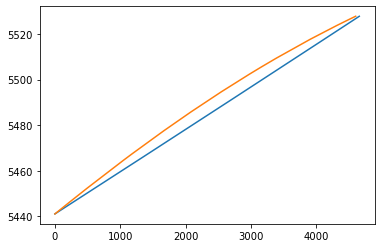

In [142]:
plt.plot(trunc_spec_wl)
print(len(trunc_spec_wl))
plt.plot(wl)
print(len(wl))

# OLD SNR STUFF

Calculate SNR for all the stars in Anna's directory by going through the original data in the APF directory. SNR is estimated as the square root of the median of the flux value in the original APF data.

In [ ]:
# wavelength solution
APF_wavelength_path = '/mnt_home/zoek/code/APF-BL-DAP/Zoe/APFTutorial/apf_wav.fits'
wl_file = fits.open(APF_wavelength_path)
wl = wl_file[0].data

In [ ]:
all_SNR_vals = []

for file in original_files:

    file = fits.open(file)
    flux = file[0].data
    
    SNR_vals = []
    for order in np.arange(31, 52):  # use orders 31 to 52 because those are the orders included in Anna's reduced data
        median_fl = np.median(flux[order])
        if median_fl < 0:
            SNR = 0
        else:
            SNR = np.sqrt(median_fl)
        SNR_vals = np.append(SNR_vals, SNR)
    star_SNR = np.average(SNR_vals)
    
    all_SNR_vals = np.append(all_SNR_vals, star_SNR)
    

In [ ]:
new1 = np.delete(all_SNR_vals, 1762)

In [ ]:
new2 = np.delete(new1, 1760)

In [ ]:
final_SNR_vals = new2

# Do the same for the residuals

In [ ]:
directory = '/mnt_home/azuckerman/BL_APF_DAP/APF_spectra/NDRR_calib'

# every residual file
list_of_files = []
for filename in os.listdir(directory):
    if filename.endswith(".fits"): 
        file_path = os.path.join(directory, filename)
        list_of_files = np.append(list_of_files, file_path)

In [ ]:
list_of_files[0]

In [ ]:
cd /datag/blpd0/datax/apf/